In [1]:
import cv2
from matplotlib import pyplot as plt
from skimage import data
import numpy as np
from skimage import color

from skimage import  restoration
from scipy.signal import convolve2d
from skimage.filters import gaussian
from skimage.feature import canny
from skimage import exposure


In [2]:
def show_image(image , title='Image',cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# image processing

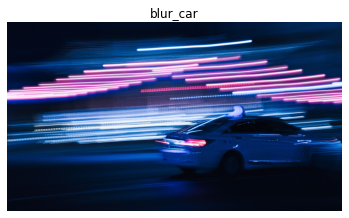

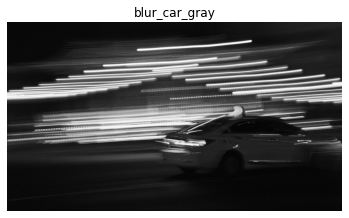

In [25]:
blur_car = plt.imread('car 5.jpg')
blur_car_gray = color.rgb2gray(blur_car)
show_image(blur_car, title='blur_car')
show_image(blur_car_gray, title='blur_car_gray')


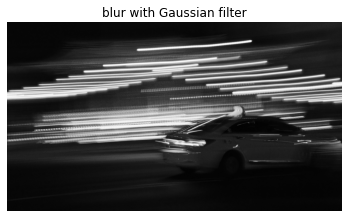

In [26]:
gaussian_image=gaussian (blur_car_gray, multichannel=True)

show_image(gaussian_image, title='blur with Gaussian filter')

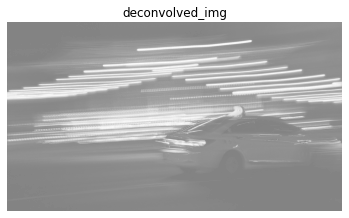

In [31]:
psf= np.ones((5,5))/25

deconvolved_img = restoration.wiener(blur_car_gray, psf,0.001)
show_image (deconvolved_img, 'deconvolved_img')

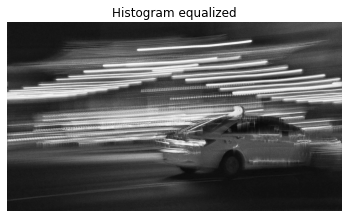

In [32]:
image_eq = exposure.equalize_adapthist(deconvolved_img)

show_image (image_eq, 'Histogram equalized')

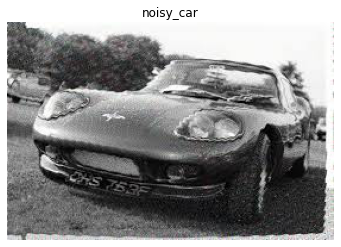

In [8]:
noisy_car = plt.imread('car 6.jpg')
noisy_car_gray = color.rgb2gray(noisy_car)
show_image(noisy_car, title='noisy_car')

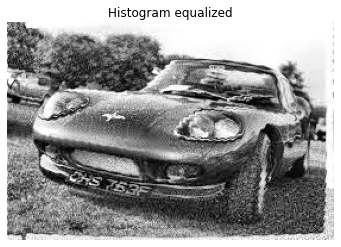

In [9]:
image_eq = exposure.equalize_adapthist(noisy_car_gray)

show_image (image_eq, 'Histogram equalized')

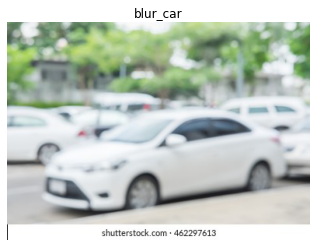

In [10]:
blur_car = plt.imread('car 7.jpg')
blur_car_gray = color.rgb2gray(blur_car)
show_image(blur_car, title='blur_car')

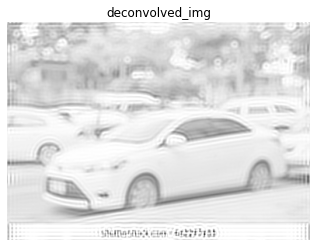

In [11]:
psf= np.ones((5,5))/25

deconvolved_img = restoration.wiener(blur_car_gray, psf,0.01)

show_image (deconvolved_img, 'deconvolved_img')

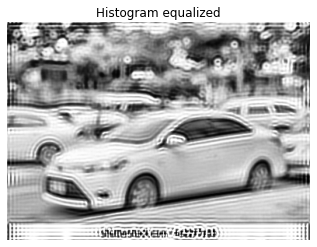

In [12]:
image_eq = exposure.equalize_adapthist(deconvolved_img)

show_image (image_eq, 'Histogram equalized')

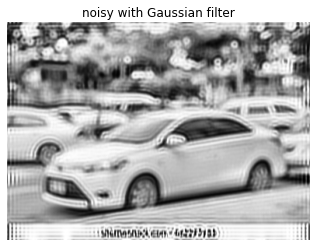

In [13]:
gaussian_image=gaussian (image_eq, multichannel=True)

show_image(gaussian_image, title='noisy with Gaussian filter')

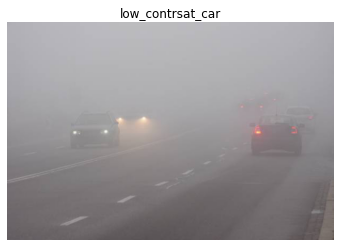

In [14]:
low_contrsat_car = plt.imread('car 8.jpg')
low_contrsat_car_gray = color.rgb2gray(low_contrsat_car)
show_image(low_contrsat_car, title='low_contrsat_car')

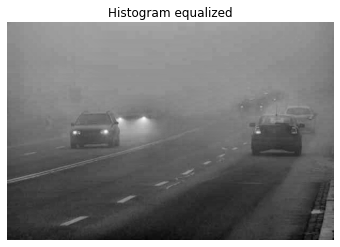

In [15]:
image_eq = exposure.equalize_adapthist(low_contrsat_car_gray)

show_image (image_eq, 'Histogram equalized')

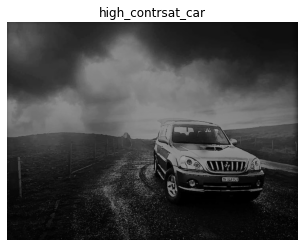

In [16]:
high_contrsat_car = plt.imread('car 13.jpg')
high_contrsat_car_gray = color.rgb2gray(high_contrsat_car)
show_image(high_contrsat_car, title='high_contrsat_car')

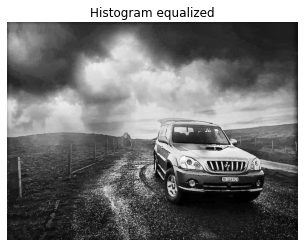

In [17]:
image_eq = exposure.equalize_adapthist(high_contrsat_car_gray)

show_image (image_eq, 'Histogram equalized')

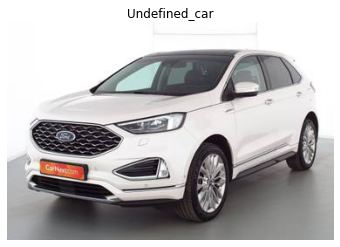

In [18]:
Undefined_car = plt.imread('car 14.jpg')
Undefined_car_gray = color.rgb2gray(Undefined_car)
show_image(Undefined_car, title='Undefined_car')

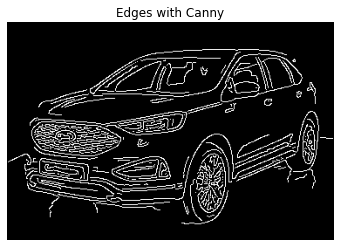

In [19]:
canny_edges = canny (Undefined_car_gray)

show_image (canny_edges, "Edges with Canny")

# Car Detection 

In [20]:
def detect_car(img_gray , img_rgb):
    stop_data = cv2.CascadeClassifier('cars.xml')
    gray = np.array(img_gray, dtype='uint8')
    found = stop_data.detectMultiScale(gray,1.1,1, minSize =(55, 55))

    amount_found = len(found)

    if amount_found != 0:

          for (x, y, width, height) in found:
            cv2.rectangle(img_rgb, (x, y),(x + height, y + width),(0, 255, 0), 5)

    plt.subplot(1, 1, 1)
    plt.imshow(img_rgb)
    plt.show()
    print("Car count :"+ str(amount_found))

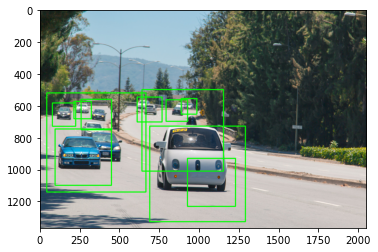

Car count :11


In [21]:
img = cv2.imread('car 1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detect_car(img_gray, img_rgb)

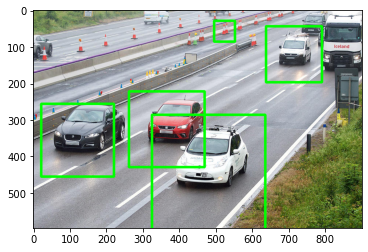

Car count :5


In [22]:
img = cv2.imread('car 2.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detect_car(img_gray, img_rgb)

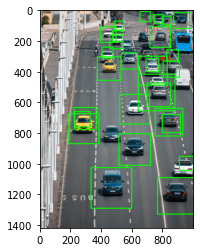

Car count :28


In [23]:
img = cv2.imread('car 3.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detect_car(img_gray, img_rgb)

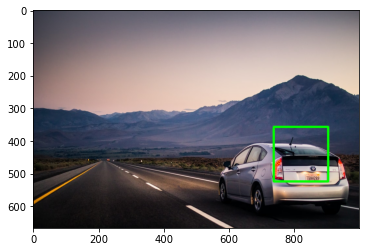

Car count :1


In [24]:
img = cv2.imread('car 4.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detect_car(img_gray, img_rgb)